create restaurants table

In [1]:
import sqlite3
from database.database_helper import create_restaurants_table
db_connection = sqlite3.connect('hometimeABM_database.db')
create_restaurants_table(db_connection)

In [2]:
from database.database_helper import add_restaurant
add_restaurant(db_connection, 'Big Burger House', 69.69, 69.69)
add_restaurant(db_connection, 'Fabulous Fish n chips', 33.33, 33.33)
add_restaurant(db_connection, 'Cheesy does it', 75.00, 65.00)
add_restaurant(db_connection, 'Pizza Perfection', 25.00, 15.50)
add_restaurant(db_connection, 'Ace Cafe', 95.00, 50.00)

In [4]:
from database.database_helper import get_all_restaurants
get_all_restaurants(db_connection)

[('Big Burger House', 69.69, 69.69),
 ('Fabulous Fish n chips', 33.33, 33.33),
 ('Cheesy does it', 75.0, 65.0),
 ('Pizza Perfection', 25.0, 15.5),
 ('Ace Cafe', 95.0, 50.0)]

This is an initial run of our model

In [5]:
from model.model import HometimeModel

model = HometimeModel(db_connection)
for i in range(0, 100):
    model.step()

97 stage one
97's utility is 1.272607302032216
97's utility is 0.5247094001709673
97's utility is 1.5565566046733965
97's utility is 0.5669442480175453
97's utility is 1.0161145427843934
22 stage one
22's utility is 1.204796005220312
22's utility is 0.8004041232390722
22's utility is 1.4575647374768117
22's utility is 0.9118473342380394
22's utility is 0.40952137199741656
51 stage one
51's utility is 0.65175087300427
51's utility is 0.8428999263333765
51's utility is 0.4893438613902452
51's utility is 0.7607647705011236
51's utility is 0.15429220666916277
9 stage one
9's utility is 0.19615577590199385
9's utility is -0.5744888270068764
9's utility is 0.10888754458075
9's utility is -0.832397368490194
9's utility is -0.11798289656317063
86 stage one
86's utility is 0.6463723432406239
86's utility is 1.0424946168036011
86's utility is 0.5994248637662722
86's utility is 0.45538034580114706
86's utility is 0.3386398329157467
64 stage one
64's utility is -0.24392709942259982
64's utility is

37's utility is -0.046409835458654736
37's utility is 0.5882411700828372
37's utility is -0.7530656133622465
89 stage one
89's utility is -1.3489375048993233
89's utility is -0.0010336187915407358
89's utility is -0.8326375264971799
89's utility is -1.080436465327996
89's utility is -1.7319540689494324
32 stage one
32's utility is 0.40422255848320043
32's utility is 2.3467315256489734
32's utility is 0.2698881390191442
32's utility is 0.3877027430137978
32's utility is -0.599158178190996
81 stage one
81's utility is 0.8627402958787291
81's utility is 0.8547305752643666
81's utility is 0.8224269999336453
81's utility is 0.7107742692170234
81's utility is 2.3495927083851775
24 stage one
24's utility is 2.170242817601139
24's utility is 0.6744761613120103
24's utility is 0.537142713321608
24's utility is 0.9527808740121291
24's utility is 0.42866431062974897
99 stage one
99's utility is 2.103987343641865
99's utility is 0.7070479206013471
99's utility is 0.5017522405514623
99's utility is

93's utility is 2.2344506065918073
93's utility is -0.17777795778088856
93's utility is 0.700474159766013
40 stage one
40's utility is 0.6663274260242815
40's utility is 2.2253352575811163
40's utility is 0.48721781309279505
40's utility is 0.7566389440083542
40's utility is 0.7859571001334916
31 stage one
31's utility is 0.17557470660908991
31's utility is 2.32815489362216
31's utility is 0.5601676634856129
31's utility is 0.7453953281657634
31's utility is -0.3583988951596426
60 stage one
60's utility is 1.3153712264566066
60's utility is 2.6772848933194964
60's utility is 1.3052698185239455
60's utility is 1.0746842703925799
60's utility is 1.0599952623025224
69 stage one
69's utility is 2.263844200305242
69's utility is 0.617877052931137
69's utility is 0.6187869768693807
69's utility is 0.10186731859558029
69's utility is -0.0752295193113457
52 stage one
52's utility is 2.6284613163225528
52's utility is 1.3677344100871038
52's utility is 0.9238922801426834
52's utility is 0.54764

6's utility is 2.759464579266208
6's utility is 0.4349577409460683
6's utility is 0.28834237526847895
6's utility is -0.18562629769965988
26 stage one
26's utility is 0.2485451369520708
26's utility is 1.5469687329161794
26's utility is -0.2997038125655922
26's utility is -0.8283079624933742
26's utility is -1.1412301309740653
61 stage one
61's utility is -1.3260234514340001
61's utility is 1.8627224611006605
61's utility is -1.419098957678247
61's utility is -0.2616964812194533
61's utility is -2.4899113913848048
23 stage one
23's utility is 0.8440175603322748
23's utility is 0.9710987855311712
23's utility is 2.643396573710011
23's utility is 1.1835788874245294
23's utility is 0.8076249891995986
53 stage one
53's utility is 0.8064050703156415
53's utility is 1.075293582949197
53's utility is 1.1257800825117532
53's utility is 2.434464799033023
53's utility is 0.9027283843674673
78 stage one
78's utility is 1.885194923219722
78's utility is 0.40751524758732155
78's utility is 0.065921

34's utility is -0.09941293234391352
34's utility is -0.2013845225243831
34's utility is 0.05073489992997082
34's utility is -0.1341145782214913
76 stage one
76's utility is 0.7700680208031727
76's utility is 0.617396992346674
76's utility is 0.45608406541090896
76's utility is 2.1286199724952675
76's utility is 0.03916087915369704
88 stage one
88's utility is 1.1329882235481978
88's utility is 0.6653599959546997
88's utility is 1.1723755492108276
88's utility is 0.915205719432997
88's utility is 2.7533672805961933
23 stage one
23's utility is 0.8440175603322748
23's utility is 0.9710987855311712
23's utility is 2.643411933710011
23's utility is 1.1835788874245294
23's utility is 0.8076249891995986
82 stage one
82's utility is 0.17248496589167212
82's utility is 0.36397017585951413
82's utility is 1.841187607579444
82's utility is 0.5853619198708565
82's utility is 0.21621218156479083
38 stage one
38's utility is -1.504143280004186
38's utility is -0.25804364568356997
38's utility is -

73's utility is 0.4597277588123537
73's utility is 0.657900724323141
73's utility is 0.23567593765343126
73's utility is 2.249616422154605
73's utility is -0.32606753795774107
10 stage one
10's utility is -0.4275630092913153
10's utility is -0.6590676421155517
10's utility is 0.8530895901501393
10's utility is -1.1228653469321768
10's utility is -0.6309923519277173
21 stage one
21's utility is 0.7120813655940954
21's utility is -0.7591909077093297
21's utility is -0.8394794003156265
21's utility is -2.112263918709247
21's utility is -1.9416587487262658
11 stage one
11's utility is -0.12237251750922032
11's utility is 0.2550266477005875
11's utility is -0.017233712764076536
11's utility is 1.652976602494703
11's utility is 0.08108739403128856
44 stage one
44's utility is -0.10708119084905299
44's utility is 2.4974587631621965
44's utility is -0.20620658163790884
44's utility is 0.745325939594135
44's utility is -0.3080189597215184
23 stage one
23's utility is 0.1342740844777618
23's uti

70's utility is -0.053605963066193585
70's utility is 1.8960051191794636
70's utility is 0.43558315553514204
70's utility is -0.006907740824538822
70's utility is -0.30932200459478687
25 stage one
25's utility is 0.30143786224657587
25's utility is 1.7287602605844907
25's utility is -0.18349032013966293
25's utility is -0.1840893627419513
25's utility is -1.2599344423568901
90 stage one
90's utility is 0.23982762243777567
90's utility is 0.358295525173734
90's utility is 1.9590838542578966
90's utility is 0.3566396343123939
90's utility is 0.4524278729019433
95 stage one
95's utility is 1.9240678001176272
95's utility is 0.28271276119308336
95's utility is 0.4721622564909848
95's utility is 0.3534876574641742
95's utility is 0.10744144991515947
8 stage one
8's utility is 2.2494186415930972
8's utility is 0.3464899800590086
8's utility is 0.9029034571908876
8's utility is 0.5739775410159489
8's utility is 0.43587359343545445
30 stage one
30's utility is 0.9350209955384473
30's utility i

66 stage one
66's utility is 2.087698912953723
66's utility is 0.49749145114155574
66's utility is 0.8141986752827917
66's utility is 0.1823055992104181
66's utility is 0.0908992485321336
78 stage one
78's utility is 1.8852109232180838
78's utility is 0.40751524758732155
78's utility is 0.06592113110688508
78's utility is 0.2849148239706778
78's utility is -0.36400235611962795
94 stage one
94's utility is -0.09123980088711225
94's utility is 2.1040386557879867
94's utility is -0.08845446348501507
94's utility is 0.4675360826824667
94's utility is -0.3795044363201765
46 stage one
46's utility is 0.9683283837715773
46's utility is 0.8197090705042626
46's utility is 0.3875831578726913
46's utility is 0.7302167485323464
46's utility is 2.4686191508972053
70 stage one
70's utility is -0.053605963066193585
70's utility is 1.896005119382625
70's utility is 0.43558315553514204
70's utility is -0.006907740824538822
70's utility is -0.30932200459478687
72 stage one
72's utility is 0.872211219017

17's utility is 0.6664059713337706
71 stage one
71's utility is 0.7884997018890906
71's utility is 0.8608920286897487
71's utility is 0.7686405748921288
71's utility is 0.7752998385203278
71's utility is 2.5229252670333766
97 stage one
97's utility is 1.272607302032216
97's utility is 0.5247094001709673
97's utility is 2.806556604673331
97's utility is 0.5669442480175453
97's utility is 1.0161145427843934
81 stage one
81's utility is 0.8627402958787291
81's utility is 0.8547305752643666
81's utility is 0.8224269999336453
81's utility is 0.7107742692170234
81's utility is 2.3995927083851116
33 stage one
33's utility is 0.43923893529417485
33's utility is 0.42329100607864345
33's utility is 1.9433941210503427
33's utility is 0.5141164893665734
33's utility is 0.3270133694584848
11 stage one
11's utility is 0.39631991225388763
11's utility is 0.7737190774636954
11's utility is 0.5014587169990314
11's utility is 2.1716690373777454
11's utility is 0.5997798237943965
32 stage one
32's utilit

26's utility is 1.5469847329161768
26's utility is -0.2997038125655922
26's utility is -0.8283079624933742
26's utility is -1.1412301309740653
3 stage one
3's utility is 1.9363315786831103
3's utility is -0.25916430319058276
3's utility is 0.6176278532457481
3's utility is -0.5170508234638223
3's utility is 0.6141697434844314
49 stage one
49's utility is 0.43764321577040766
49's utility is 0.5734517781223085
49's utility is 0.20502226781265998
49's utility is 2.183193947432041
49's utility is -0.5504284961590633
52 stage one
52's utility is 2.63046131632255
52's utility is 1.3677344100871038
52's utility is 0.9238922801426834
52's utility is 0.5476429928704235
52's utility is 0.022423872085464813
7 stage one
7's utility is 0.665570183360975
7's utility is 0.022262712358954273
7's utility is 2.253135468727368
7's utility is -0.819593523262512
7's utility is 0.5584678825033254
39 stage one
39's utility is 0.5831080658882839
39's utility is 1.0469139696243361
39's utility is 0.81626079852

90 stage one
90's utility is -0.6373085271706382
90's utility is -0.51884062443468
90's utility is 1.0819477048542825
90's utility is -0.5204965152960201
90's utility is -0.4247082767064707
93 stage one
93's utility is 0.5343011473417433
93's utility is 0.4502975830652428
93's utility is 1.9208461925915161
93's utility is -0.49338237178117994
93's utility is 0.38486974576572164
78 stage one
78's utility is 1.3545426026215348
78's utility is -0.12315307301086592
78's utility is -0.4647471894913024
78's utility is -0.24575349662750967
78's utility is -0.8946706767178154
18 stage one
18's utility is 0.2529819214300628
18's utility is -0.2516887294688414
18's utility is 1.516688261157476
18's utility is -1.3867955903477218
18's utility is -0.75774544961334
76 stage one
76's utility is -0.04951205949191323
76's utility is -0.2021830879484121
76's utility is -0.3634960148841771
76's utility is 1.3090405322001812
76's utility is -0.780419201141389
4 stage one
4's utility is -3.017741104089316

46 stage one
46's utility is 0.34045981537563375
46's utility is 0.1918405021083191
46's utility is -0.24028541052325209
46's utility is 0.10234818013640312
46's utility is 1.8407505825029005
80 stage one
80's utility is -0.9299264573201794
80's utility is 1.4589708909809207
80's utility is -0.8366466135482449
80's utility is -0.6432452382376527
80's utility is -1.2315118550965392
90 stage one
90's utility is -0.6373085271706382
90's utility is -0.51884062443468
90's utility is 1.0819477048542825
90's utility is -0.5204965152960201
90's utility is -0.4247082767064707
38 stage one
38's utility is -2.236099353934389
38's utility is -0.9899997196137732
38's utility is -1.962610706507622
38's utility is -2.527052192805396
38's utility is -3.6650597380818852
60 stage one
60's utility is 0.9787423890644527
60's utility is 2.342656055927342
60's utility is 0.9686409811317915
60's utility is 0.7380554330004259
60's utility is 0.7233664249103684
37 stage one
37's utility is -1.2004277357413962


72's utility is 2.2116056591693294
72's utility is -0.053320861209160186
72's utility is 0.8593683686631758
12 stage one
12's utility is 0.9914088208985601
12's utility is 0.9171280319442454
12's utility is 1.0256620465627126
12's utility is 2.2952658049701853
12's utility is 0.5966103391665265
35 stage one
35's utility is 0.5069133355662094
35's utility is 0.4886852662471816
35's utility is 0.4355450041378474
35's utility is -0.0647833287893187
35's utility is 1.8146567129579747
37 stage one
37's utility is -0.29992829903033325
37's utility is 1.9118909079677469
37's utility is -0.046409835458654736
37's utility is 0.5882411700828372
37's utility is -0.7530656133622465
51 stage one
51's utility is 0.65175087300427
51's utility is 2.0928999263333767
51's utility is 0.4893438613902452
51's utility is 0.7607647705011236
51's utility is 0.15429220666916277
48 stage one
48's utility is -0.1464325574470522
48's utility is 0.23026351819808988
48's utility is 0.19946820861825854
48's utility 

13's utility is 0.06050762908885099
13's utility is 0.3887487214631704
13's utility is 1.8187979099655747
13's utility is 0.5658516958262323
13's utility is 0.24077083658919363
20 stage one
20's utility is 0.0372703798775148
20's utility is 1.8103165614451275
20's utility is -0.2851004285050147
20's utility is -0.5486066000764239
20's utility is -1.0974755497264121
25 stage one
25's utility is 0.0747699709874583
25's utility is 1.5020923695301733
25's utility is -0.4101582113987804
25's utility is -0.4107572540010689
25's utility is -1.4866023336160077
45 stage one
45's utility is -0.5479427839118056
45's utility is -0.5566237168574597
45's utility is -0.7610491554976608
45's utility is -0.867149505231021
45's utility is -2.127710112726022
72 stage one
72's utility is 0.2937797735878712
72's utility is 0.29500882778308546
72's utility is 1.6331742137396288
72's utility is -0.6317523066388611
72's utility is 0.28093692323347497
23 stage one
23's utility is 0.1342740844777618
23's utilit

11 stage one
11's utility is 0.39631991225388763
11's utility is 0.7737190774636954
11's utility is 0.5014587169990314
11's utility is 2.1716690373778107
11's utility is 0.5997798237943965
4 stage one
4's utility is -2.5311789578590864
4's utility is -0.4661554338450951
4's utility is -2.410919790650877
4's utility is -1.7735558547476007
4's utility is -3.865435027168881
13 stage one
13's utility is 0.316799530065733
13's utility is 0.6450406224400524
13's utility is 2.075089810942457
13's utility is 0.8221435968031146
13's utility is 0.4970627375660759
18 stage one
18's utility is 0.5526874496190342
18's utility is 0.04801679872012987
18's utility is 1.816393789346447
18's utility is -1.0870900621587507
18's utility is -0.4580399214243689
8 stage one
8's utility is 2.2494186417978974
8's utility is 0.3464899800590086
8's utility is 0.9029034571908876
8's utility is 0.5739775410159489
8's utility is 0.43587359343545445
24 stage one
24's utility is 2.2202428176011386
24's utility is 0.6

22's utility is 0.9118473342380394
22's utility is 0.40952137199741656
63 stage one
63's utility is 2.025886690551653
63's utility is 0.48722872540414774
63's utility is 0.22671340501494713
63's utility is 0.3101068559140731
63's utility is 0.2724608225901571
93 stage one
93's utility is 0.8499055613420347
93's utility is 0.7659019970655342
93's utility is 2.2364506065918075
93's utility is -0.17777795778088856
93's utility is 0.700474159766013
94 stage one
94's utility is -0.09123980088711225
94's utility is 2.1040386557896245
94's utility is -0.08845446348501507
94's utility is 0.4675360826824667
94's utility is -0.3795044363201765
21 stage one
21's utility is 1.3248832264021462
21's utility is -0.14638905202127894
21's utility is -0.22667754462757572
21's utility is -1.499462063021196
21's utility is -1.328856893038215
56 stage one
56's utility is 0.39068158370585904
56's utility is 1.9157553421432172
56's utility is 0.3054625687389785
56's utility is 0.4113512256677735
56's utility

21's utility is -0.22667754462757572
21's utility is -1.499462063021196
21's utility is -1.328856893038215
70 stage one
70's utility is -0.053605963066193585
70's utility is 1.8960051193842633
70's utility is 0.43558315553514204
70's utility is -0.006907740824538822
70's utility is -0.30932200459478687
38 stage one
38's utility is -1.504143280004186
38's utility is -0.25804364568356997
38's utility is -1.2306546325774186
38's utility is -1.7950961188751928
38's utility is -2.933103664151682
84 stage one
84's utility is 2.1603570207641583
84's utility is 0.5178640357700339
84's utility is 0.6729398843393118
84's utility is -0.14416303013398768
84's utility is 0.061052965466804276
97 stage one
97's utility is 1.272607302032216
97's utility is 0.5247094001709673
97's utility is 2.8065566046733967
97's utility is 0.5669442480175453
97's utility is 1.0161145427843934
0 stage one
0's utility is 0.33154731214602373
0's utility is -0.3856918640106834
0's utility is 1.6496966734238314
0's utili

87 stage one
87's utility is 0.7299080746378994
87's utility is 2.6542100567029547
87's utility is 0.4314541831038512
87's utility is 1.0306544019878336
87's utility is -0.4354312675888039
92 stage one
92's utility is 1.1345726528146514
92's utility is 0.9586340662822166
92's utility is 2.428474679311754
92's utility is 0.558172327496234
92's utility is 0.518827657153807
74 stage one
74's utility is -0.33424066553329895
74's utility is 1.5612825139994362
74's utility is -0.4755525037337117
74's utility is -0.3817032924129073
74's utility is -0.8212071881821913
82 stage one
82's utility is -0.3632378576209408
82's utility is -0.17175264765309872
82's utility is 1.305465424066831
82's utility is 0.049639096358243595
82's utility is -0.319510641947822
31 stage one
31's utility is 0.08822434222354092
31's utility is 2.2428045292366106
31's utility is 0.47281729910006376
31's utility is 0.6580449637802144
31's utility is -0.4457492595451916
23 stage one
23's utility is 0.1342740844777618
23

36's utility is 0.2154294523066962
36's utility is 1.9124832113086945
36's utility is 0.20000263630168158
36's utility is -1.0991328054855658
36's utility is -1.214520969609687
6 stage one
6's utility is 0.7880231009434648
6's utility is 2.759480579266208
6's utility is 0.4349577409460683
6's utility is 0.28834237526847895
6's utility is -0.18562629769965988
10 stage one
10's utility is 0.4006725202576148
10's utility is 0.16916788743337835
10's utility is 1.6813251248190693
10's utility is -0.2946298173832467
10's utility is 0.1972431776212128
94 stage one
94's utility is -0.09123980088711225
94's utility is 2.1040386557896245
94's utility is -0.08845446348501507
94's utility is 0.4675360826824667
94's utility is -0.3795044363201765
63 stage one
63's utility is 2.025886690551653
63's utility is 0.48722872540414774
63's utility is 0.22671340501494713
63's utility is 0.3101068559140731
63's utility is 0.2724608225901571
67 stage one
67's utility is -0.005622045894294381
67's utility is 

76 stage one
76's utility is 0.7700680208031727
76's utility is 0.617396992346674
76's utility is 0.45608406541090896
76's utility is 2.128620612495267
76's utility is 0.03916087915369704
16 stage one
16's utility is -10.717201431742948
16's utility is -8.894066476125769
16's utility is -10.93246681810326
16's utility is -17.76629810186473
16's utility is -19.061605310291878
53 stage one
53's utility is 0.8064050703156415
53's utility is 1.075293582949197
53's utility is 1.1257800825117532
53's utility is 2.434480799033023
53's utility is 0.9027283843674673
41 stage one
41's utility is 0.39879474778517654
41's utility is -0.256151737996148
41's utility is 1.8411190294235444
41's utility is -1.220361673958083
41's utility is -0.12876630763481223
27 stage one
27's utility is 0.6545735949810628
27's utility is 1.205120294577605
27's utility is 2.6328216593406504
27's utility is 0.6180187494162632
27's utility is 0.7006566870932303
42 stage one
42's utility is -0.0538473113346426
42's util

92's utility is 2.3173830758545533
92's utility is 0.4470807240390333
92's utility is 0.40773605369660626
13 stage one
13's utility is 0.316799530065733
13's utility is 0.6450406224400524
13's utility is 2.075089810942457
13's utility is 0.8221435968031146
13's utility is 0.4970627375660759
40 stage one
40's utility is 0.6663274260242815
40's utility is 2.2273352575811165
40's utility is 0.48721781309279505
40's utility is 0.7566389440083542
40's utility is 0.7859571001334916
21 stage one
21's utility is 1.3248832264021462
21's utility is -0.14638905202127894
21's utility is -0.22667754462757572
21's utility is -1.499462063021196
21's utility is -1.328856893038215
10 stage one
10's utility is 0.4006725202576148
10's utility is 0.16916788743337835
10's utility is 1.6813251248190693
10's utility is -0.2946298173832467
10's utility is 0.1972431776212128
17 stage one
17's utility is 1.012150755090195
17's utility is 2.29880685691906
17's utility is 0.8305677212084827
17's utility is 0.7253

48's utility is 0.19946820861825854
48's utility is -0.35828773784710755
48's utility is 1.6810772846277922
41 stage one
41's utility is 0.39879474778517654
41's utility is -0.256151737996148
41's utility is 1.8411190294235444
41's utility is -1.220361673958083
41's utility is -0.12876630763481223
81 stage one
81's utility is 0.8627402958787291
81's utility is 0.8547305752643666
81's utility is 0.8224269999336453
81's utility is 0.7107742692170234
81's utility is 2.3995927083851774
87 stage one
87's utility is 0.8319265046697624
87's utility is 2.756228486734818
87's utility is 0.5334726131357141
87's utility is 1.1326728320196968
87's utility is -0.33341283755694096
49 stage one
49's utility is 0.43764321577040766
49's utility is 0.5734517781223085
49's utility is 0.20502226781265998
49's utility is 2.1831939474320436
49's utility is -0.5504284961590633
38 stage one
38's utility is -1.504143280004186
38's utility is -0.25804364568356997
38's utility is -1.2306546325774186
38's utility

51's utility is -0.1849187102956278
44 stage one
44's utility is -0.10708119084905299
44's utility is 2.4974587682821965
44's utility is -0.20620658163790884
44's utility is 0.745325939594135
44's utility is -0.3080189597215184
5 stage one
5's utility is 1.3899686873798704
5's utility is -1.0716989458277744
5's utility is -0.056395112687056215
5's utility is -2.5029070486115854
5's utility is -2.0705979181008733
69 stage one
69's utility is 1.6758138976868358
69's utility is 0.027846750312730595
69's utility is 0.028756674250974057
69's utility is -0.4881629840228262
69's utility is -0.6652598219297523
93 stage one
93's utility is 0.5343011473417433
93's utility is 0.4502975830652428
93's utility is 1.9208461925915161
93's utility is -0.49338237178117994
93's utility is 0.38486974576572164
0 stage one
0's utility is -0.49936015233359576
0's utility is -1.216599328490303
0's utility is 0.8187892089442118
0's utility is -1.394591667814822
0's utility is -1.001805514644031
52 stage one
52

75's utility is -1.1622936151616499
75's utility is -1.1311896026721693
71 stage one
71's utility is 0.2271366295412189
71's utility is 0.29952895634187693
71's utility is 0.20727750254425698
71's utility is 0.21393676617245605
71's utility is 1.9615621946855701
87 stage one
87's utility is 0.7299080746378994
87's utility is 2.6542100567029547
87's utility is 0.4314541831038512
87's utility is 1.0306544019878336
87's utility is -0.4354312675888039
70 stage one
70's utility is -0.3982275925502065
70's utility is 1.5513834899002503
70's utility is 0.09096152605112906
70's utility is -0.3515293703085518
70's utility is -0.6539436340787999
92 stage one
92's utility is 1.1345726528146514
92's utility is 0.9586340662822166
92's utility is 2.428474679311754
92's utility is 0.558172327496234
92's utility is 0.518827657153807
13 stage one
13's utility is 0.06050762908885099
13's utility is 0.3887487214631704
13's utility is 1.8187979099655747
13's utility is 0.5658516958262323
13's utility is 0

11's utility is 0.7737190774636954
11's utility is 0.5014587169990314
11's utility is 2.1716690373778107
11's utility is 0.5997798237943965
60 stage one
60's utility is 1.3153712264566066
60's utility is 2.679284893319496
60's utility is 1.3052698185239455
60's utility is 1.0746842703925799
60's utility is 1.0599952623025224
56 stage one
56's utility is 0.39068158370585904
56's utility is 1.9157553421432172
56's utility is 0.3054625687389785
56's utility is 0.4113512256677735
56's utility is 0.026366387496292276
35 stage one
35's utility is 0.5069133355662094
35's utility is 0.4886852662471816
35's utility is 0.4355450041378474
35's utility is -0.0647833287893187
35's utility is 1.8146567129579747
24 stage one
24's utility is 2.2202428176011386
24's utility is 0.6744761613120103
24's utility is 0.537142713321608
24's utility is 0.9527808740121291
24's utility is 0.42866431062974897
80 stage one
80's utility is 0.10376767340577298
80's utility is 2.492665021706873
80's utility is 0.1970

51 stage one
51's utility is 0.65175087300427
51's utility is 2.0928999263333767
51's utility is 0.4893438613902452
51's utility is 0.7607647705011236
51's utility is 0.15429220666916277
29 stage one
29's utility is -0.3813554329845059
29's utility is 1.2629267860032924
29's utility is -0.037846744695408274
29's utility is -0.7804203113923183
29's utility is -1.0950434264244555
14 stage one
14's utility is 1.0988537059228016
14's utility is 2.457645192244911
14's utility is 1.1511416875939982
14's utility is 0.7291615905812534
14's utility is 0.9959355170593911
33 stage one
33's utility is 0.43923893529417485
33's utility is 0.42329100607864345
33's utility is 1.9433941210504084
33's utility is 0.5141164893665734
33's utility is 0.3270133694584848
15 stage one
15's utility is 0.21668617194482764
15's utility is 2.354552103365594
15's utility is -0.28237937653950107
15's utility is 0.954244554083391
15's utility is -0.5053515347716113
31 stage one
31's utility is 0.17557470660908991
31'

54's utility is 2.1931375711419308
54's utility is 0.7051768661555972
38 stage one
38's utility is -1.504143280004186
38's utility is -0.25804364568356997
38's utility is -1.2306546325774186
38's utility is -1.7950961188751928
38's utility is -2.933103664151682
44 stage one
44's utility is 0.28796387099417253
44's utility is 2.8925038301254222
44's utility is 0.18883848020531668
44's utility is 1.1403710014373607
44's utility is 0.08702610212170714
62 stage one
62's utility is -0.1752305779563833
62's utility is -0.6353019509224053
62's utility is 1.2642861444777986
62's utility is -1.568301292642788
62's utility is -0.7813169778635697
64 stage one
64's utility is -0.24392709942259982
64's utility is 1.7556451441729706
64's utility is -0.6193360193578015
64's utility is -0.25006286345826945
64's utility is -1.0439805558268578
71 stage one
71's utility is 0.7884997018890906
71's utility is 0.8608920286897487
71's utility is 0.7686405748921288
71's utility is 0.7752998385203278
71's util

76 stage one
76's utility is 0.7700680208031727
76's utility is 0.617396992346674
76's utility is 0.45608406541090896
76's utility is 2.128620612495267
76's utility is 0.03916087915369704
23 stage one
23's utility is 0.8440175603322748
23's utility is 0.9710987855311712
23's utility is 2.643412573710011
23's utility is 1.1835788874245294
23's utility is 0.8076249891995986
13 stage one
13's utility is 0.316799530065733
13's utility is 0.6450406224400524
13's utility is 2.075089810942457
13's utility is 0.8221435968031146
13's utility is 0.4970627375660759
17 stage one
17's utility is 1.012150755090195
17's utility is 2.29880685691906
17's utility is 0.8305677212084827
17's utility is 0.7253761442371424
17's utility is 0.6664059713337706
45 stage one
45's utility is -0.2559545763935187
45's utility is -0.2646355093391728
45's utility is -0.4690609479793739
45's utility is -0.575161297712734
45's utility is -1.8357219052077347
57 stage one
57's utility is 1.772748080905761
57's utility is

44's utility is 2.8925038301254222
44's utility is 0.18883848020531668
44's utility is 1.1403710014373607
44's utility is 0.08702610212170714
63 stage one
63's utility is 2.025886690551653
63's utility is 0.48722872540414774
63's utility is 0.22671340501494713
63's utility is 0.3101068559140731
63's utility is 0.2724608225901571
16 stage one
16's utility is -10.717201431742948
16's utility is -8.894066476125769
16's utility is -10.93246681810326
16's utility is -17.76629810186473
16's utility is -19.061605310291878
28 stage one
28's utility is -0.40915789441846284
28's utility is 2.077734238943755
28's utility is -0.3879443412057626
28's utility is 0.19394262141287721
28's utility is -0.9936460040850053
26 stage one
26's utility is 0.2485451369520708
26's utility is 1.5469847329161794
26's utility is -0.2997038125655922
26's utility is -0.8283079624933742
26's utility is -1.1412301309740653
3 stage one
3's utility is 1.936331578683113
3's utility is -0.25916430319058276
3's utility is 

3's utility is 0.6176278532457481
3's utility is -0.5170508234638223
3's utility is 0.6141697434844314
40 stage one
40's utility is 0.6663274260242815
40's utility is 2.2273352575811165
40's utility is 0.48721781309279505
40's utility is 0.7566389440083542
40's utility is 0.7859571001334916
17 stage one
17's utility is 1.012150755090195
17's utility is 2.29880685691906
17's utility is 0.8305677212084827
17's utility is 0.7253761442371424
17's utility is 0.6664059713337706
90 stage one
90's utility is 0.23982762243777567
90's utility is 0.358295525173734
90's utility is 1.9590838544626963
90's utility is 0.3566396343123939
90's utility is 0.4524278729019433
57 stage one
57's utility is 1.772748080905761
57's utility is -0.07692503384241256
57's utility is 0.15459295146358643
57's utility is -0.7894739602767966
57's utility is -0.49434451898608756
16 stage one
16's utility is -10.717201431742948
16's utility is -8.894066476125769
16's utility is -10.93246681810326
16's utility is -17.766

67's utility is 0.10276106268299756
67's utility is -0.0800728210279471
67's utility is -1.0339145008170547
36 stage one
36's utility is 0.2154294523066962
36's utility is 1.9124832113086945
36's utility is 0.20000263630168158
36's utility is -1.0991328054855658
36's utility is -1.214520969609687
38 stage one
38's utility is -1.504143280004186
38's utility is -0.25804364568356997
38's utility is -1.2306546325774186
38's utility is -1.7950961188751928
38's utility is -2.933103664151682
10 stage one
10's utility is 0.4006725202576148
10's utility is 0.16916788743337835
10's utility is 1.6813251248190693
10's utility is -0.2946298173832467
10's utility is 0.1972431776212128
66 stage one
66's utility is 2.087698912955361
66's utility is 0.49749145114155574
66's utility is 0.8141986752827917
66's utility is 0.1823055992104181
66's utility is 0.0908992485321336
11 stage one
11's utility is 0.39631991225388763
11's utility is 0.7737190774636954
11's utility is 0.5014587169990314
11's utility 

86's utility is 0.6463723432406239
86's utility is 2.292494616803601
86's utility is 0.5994248637662722
86's utility is 0.45538034580114706
86's utility is 0.3386398329157467
10 stage one
10's utility is 0.4006725202576148
10's utility is 0.16916788743337835
10's utility is 1.6813251248190693
10's utility is -0.2946298173832467
10's utility is 0.1972431776212128
1 stage one
1's utility is 2.420646157243752
1's utility is 0.8862922302711199
1's utility is 1.1351044132755537
1's utility is 1.0784079816329744
1's utility is 0.7761295725205
16 stage one
16's utility is -10.717201431742948
16's utility is -8.894066476125769
16's utility is -10.93246681810326
16's utility is -17.76629810186473
16's utility is -19.061605310291878
39 stage one
39's utility is 0.5831080658882839
39's utility is 1.0469139696243361
39's utility is 0.8162607985255099
39's utility is 2.68055943419732
39's utility is 0.2919812419790197
58 stage one
58's utility is 1.0251075868774437
58's utility is 2.787863274264095

70's utility is 1.5513834899002503
70's utility is 0.09096152605112906
70's utility is -0.3515293703085518
70's utility is -0.6539436340787999
13 stage one
13's utility is 0.06050762908885099
13's utility is 0.3887487214631704
13's utility is 1.8187979099655747
13's utility is 0.5658516958262323
13's utility is 0.24077083658919363
83 stage one
83's utility is -0.23667173306440614
83's utility is -0.7819471160308167
83's utility is 1.4548722531883358
83's utility is -1.5270124919642447
83's utility is -0.5250513342256329
38 stage one
38's utility is -2.236099353934389
38's utility is -0.9899997196137732
38's utility is -1.962610706507622
38's utility is -2.527052192805396
38's utility is -3.6650597380818852
60 stage one
60's utility is 0.9787423890644527
60's utility is 2.342656055927342
60's utility is 0.9686409811317915
60's utility is 0.7380554330004259
60's utility is 0.7233664249103684
92 stage one
92's utility is 1.1345726528146514
92's utility is 0.9586340662822166
92's utility i

56's utility is 0.3054625687389785
56's utility is 0.4113512256677735
56's utility is 0.026366387496292276
93 stage one
93's utility is 0.8499055613420347
93's utility is 0.7659019970655342
93's utility is 2.2364506065918075
93's utility is -0.17777795778088856
93's utility is 0.700474159766013
53 stage one
53's utility is 0.8064050703156415
53's utility is 1.075293582949197
53's utility is 1.1257800825117532
53's utility is 2.434480799033023
53's utility is 0.9027283843674673
17 stage one
17's utility is 1.012150755090195
17's utility is 2.29880685691906
17's utility is 0.8305677212084827
17's utility is 0.7253761442371424
17's utility is 0.6664059713337706
70 stage one
70's utility is -0.053605963066193585
70's utility is 1.8960051193842633
70's utility is 0.43558315553514204
70's utility is -0.006907740824538822
70's utility is -0.30932200459478687
55 stage one
55's utility is -0.03358844438125619
55's utility is 2.2528698479485274
55's utility is 0.7265978634609879
55's utility is 

75's utility is -0.16168878024902633
75's utility is 1.5815781697059212
75's utility is -0.4602065177022845
75's utility is -1.033544860860458
75's utility is -1.0024408483709775
87 stage one
87's utility is 0.8319265046697624
87's utility is 2.756228486734818
87's utility is 0.5334726131357141
87's utility is 1.1326728320196968
87's utility is -0.33341283755694096
72 stage one
72's utility is 0.8722112190175721
72's utility is 0.8734402732127863
72's utility is 2.2116056591693294
72's utility is -0.053320861209160186
72's utility is 0.8593683686631758
1 stage one
1's utility is 2.420646157243752
1's utility is 0.8862922302711199
1's utility is 1.1351044132755537
1's utility is 1.0784079816329744
1's utility is 0.7761295725205
86 stage one
86's utility is 0.6463723432406239
86's utility is 2.292494616803601
86's utility is 0.5994248637662722
86's utility is 0.45538034580114706
86's utility is 0.3386398329157467
21 stage one
21's utility is 1.3248832264021462
21's utility is -0.14638905

12 stage one
12's utility is 0.9914088208985601
12's utility is 0.9171280319442454
12's utility is 1.0256620465627126
12's utility is 2.2952658049701853
12's utility is 0.5966103391665265
40 stage one
40's utility is 0.6663274260242815
40's utility is 2.2273352575811165
40's utility is 0.48721781309279505
40's utility is 0.7566389440083542
40's utility is 0.7859571001334916
19 stage one
19's utility is 1.898825987584182
19's utility is -0.41115955722803044
19's utility is 0.49919539558233883
19's utility is -1.5411650569136952
19's utility is -1.1988888600094736
76 stage one
76's utility is 0.7700680208031727
76's utility is 0.617396992346674
76's utility is 0.45608406541090896
76's utility is 2.128620612495267
76's utility is 0.03916087915369704
60 stage one
60's utility is 1.3153712264566066
60's utility is 2.679284893319496
60's utility is 1.3052698185239455
60's utility is 1.0746842703925799
60's utility is 1.0599952623025224
61 stage one
61's utility is -1.3260234514340001
61's ut

1's utility is 1.0784079816329744
1's utility is 0.7761295725205
89 stage one
89's utility is -1.3489375048993233
89's utility is -0.0010336187915407358
89's utility is -0.8326375264971799
89's utility is -1.080436465327996
89's utility is -1.7319540689494324
64 stage one
64's utility is -0.24392709942259982
64's utility is 1.7556451441729706
64's utility is -0.6193360193578015
64's utility is -0.25006286345826945
64's utility is -1.0439805558268578
20 stage one
20's utility is 0.7330929189533286
20's utility is 2.5061391005209415
20's utility is 0.410722110570799
20's utility is 0.1472159389993899
20's utility is -0.40165301065059844
44 stage one
44's utility is 0.28796387099417253
44's utility is 2.8925038301254222
44's utility is 0.18883848020531668
44's utility is 1.1403710014373607
44's utility is 0.08702610212170714
95 stage one
95's utility is 1.924067800322427
95's utility is 0.28271276119308336
95's utility is 0.4721622564909848
95's utility is 0.3534876574641742
95's utility 

25's utility is -0.18349032013966293
25's utility is -0.1840893627419513
25's utility is -1.2599344423568901
82 stage one
82's utility is 0.17248496589167212
82's utility is 0.36397017585951413
82's utility is 1.841188247579444
82's utility is 0.5853619198708565
82's utility is 0.21621218156479083
4 stage one
4's utility is -2.5311789578590864
4's utility is -0.4661554338450951
4's utility is -2.410919790650877
4's utility is -1.7735558547476007
4's utility is -3.865435027168881
66 stage one
66's utility is 2.087698912955361
66's utility is 0.49749145114155574
66's utility is 0.8141986752827917
66's utility is 0.1823055992104181
66's utility is 0.0908992485321336
60 stage one
60's utility is 1.3153712264566066
60's utility is 2.679284893319496
60's utility is 1.3052698185239455
60's utility is 1.0746842703925799
60's utility is 1.0599952623025224
56 stage one
56's utility is 0.39068158370585904
56's utility is 1.9157553421432172
56's utility is 0.3054625687389785
56's utility is 0.4113

80's utility is 0.19704751717770752
80's utility is 0.3904488924882997
80's utility is -0.19781772437058676
26 stage one
26's utility is 0.2485451369520708
26's utility is 1.5469847329161794
26's utility is -0.2997038125655922
26's utility is -0.8283079624933742
26's utility is -1.1412301309740653
11 stage one
11's utility is 0.39631991225388763
11's utility is 0.7737190774636954
11's utility is 0.5014587169990314
11's utility is 2.1716690373778107
11's utility is 0.5997798237943965
72 stage one
72's utility is 0.8722112190175721
72's utility is 0.8734402732127863
72's utility is 2.2116056591693294
72's utility is -0.053320861209160186
72's utility is 0.8593683686631758
53 stage one
53's utility is 0.8064050703156415
53's utility is 1.075293582949197
53's utility is 1.1257800825117532
53's utility is 2.434480799033023
53's utility is 0.9027283843674673
75 stage one
75's utility is -0.16168878024902633
75's utility is 1.5815781697059212
75's utility is -0.4602065177022845
75's utility i

66 stage one
66's utility is 2.087698912955361
66's utility is 0.49749145114155574
66's utility is 0.8141986752827917
66's utility is 0.1823055992104181
66's utility is 0.0908992485321336
57 stage one
57's utility is 1.772748080905761
57's utility is -0.07692503384241256
57's utility is 0.15459295146358643
57's utility is -0.7894739602767966
57's utility is -0.49434451898608756
28 stage one
28's utility is -0.40915789441846284
28's utility is 2.077734238943755
28's utility is -0.3879443412057626
28's utility is 0.19394262141287721
28's utility is -0.9936460040850053
21 stage one
21's utility is 1.3248832264021462
21's utility is -0.14638905202127894
21's utility is -0.22667754462757572
21's utility is -1.499462063021196
21's utility is -1.328856893038215
14 stage one
14's utility is 1.0988537059228016
14's utility is 2.457645192244911
14's utility is 1.1511416875939982
14's utility is 0.7291615905812534
14's utility is 0.9959355170593911
64 stage one
64's utility is -0.2439270994225998

90's utility is 0.23982762243777567
90's utility is 0.358295525173734
90's utility is 1.9590838544626963
90's utility is 0.3566396343123939
90's utility is 0.4524278729019433
4 stage one
4's utility is -2.5311789578590864
4's utility is -0.4661554338450951
4's utility is -2.410919790650877
4's utility is -1.7735558547476007
4's utility is -3.865435027168881
67 stage one
67's utility is -0.005622045894294381
67's utility is 2.8100198830173913
67's utility is 0.10276106268299756
67's utility is -0.0800728210279471
67's utility is -1.0339145008170547
13 stage one
13's utility is 0.316799530065733
13's utility is 0.6450406224400524
13's utility is 2.075089810942457
13's utility is 0.8221435968031146
13's utility is 0.4970627375660759
53 stage one
53's utility is 0.8064050703156415
53's utility is 1.075293582949197
53's utility is 1.1257800825117532
53's utility is 2.434480799033023
53's utility is 0.9027283843674673
6 stage one
6's utility is 0.7880231009434648
6's utility is 2.75948057926

56's utility is 0.3105301772404412
56's utility is 1.8356039356777991
56's utility is 0.2253111622735604
56's utility is 0.33119981920235564
56's utility is -0.053785018969125575
68 stage one
68's utility is 0.4861094348195225
68's utility is 0.7762479106088757
68's utility is 2.113536564354185
68's utility is 0.723293680620783
68's utility is 0.5877626746558234
61 stage one
61's utility is -1.3260234514340001
61's utility is 1.8627384611006605
61's utility is -1.419098957678247
61's utility is -0.2616964812194533
61's utility is -2.4899113913848048
84 stage one
84's utility is 2.1603570207641583
84's utility is 0.5178640357700339
84's utility is 0.6729398843393118
84's utility is -0.14416303013398768
84's utility is 0.061052965466804276
63 stage one
63's utility is 2.025886690551653
63's utility is 0.48722872540414774
63's utility is 0.22671340501494713
63's utility is 0.3101068559140731
63's utility is 0.2724608225901571
95 stage one
95's utility is 1.924067800322427
95's utility is 

34's utility is -0.1341145782214913
73 stage one
73's utility is 0.7894613808035197
73's utility is 0.9876343463143069
73's utility is 0.5654095596445972
73's utility is 2.5793500492657713
73's utility is 0.003666084033424888
23 stage one
23's utility is 0.8440175603322748
23's utility is 0.9710987855311712
23's utility is 2.643412573710011
23's utility is 1.1835788874245294
23's utility is 0.8076249891995986
62 stage one
62's utility is -0.1752305779563833
62's utility is -0.6353019509224053
62's utility is 1.2642861444777986
62's utility is -1.568301292642788
62's utility is -0.7813169778635697
33 stage one
33's utility is 0.43923893529417485
33's utility is 0.42329100607864345
33's utility is 1.9433941210504084
33's utility is 0.5141164893665734
33's utility is 0.3270133694584848
6 stage one
6's utility is 0.7880231009434648
6's utility is 2.759480579266208
6's utility is 0.4349577409460683
6's utility is 0.28834237526847895
6's utility is -0.18562629769965988
4 stage one
4's utilit

46's utility is 0.9683283837715773
46's utility is 0.8197090705042626
46's utility is 0.3875831578726913
46's utility is 0.7302167485323464
46's utility is 2.4686191508988435
68 stage one
68's utility is 1.061646520092814
68's utility is 1.351784995882167
68's utility is 2.6890736496274767
68's utility is 1.2988307658940748
68's utility is 1.163299759929115
81 stage one
81's utility is 0.8627402958787291
81's utility is 0.8547305752643666
81's utility is 0.8224269999336453
81's utility is 0.7107742692170234
81's utility is 2.3995927083851774
15 stage one
15's utility is 0.21668617194482764
15's utility is 2.354552103365594
15's utility is -0.28237937653950107
15's utility is 0.954244554083391
15's utility is -0.5053515347716113
1 stage one
1's utility is 2.420646157243752
1's utility is 0.8862922302711199
1's utility is 1.1351044132755537
1's utility is 1.0784079816329744
1's utility is 0.7761295725205
82 stage one
82's utility is 0.17248496589167212
82's utility is 0.36397017585951413

In [6]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
agent_vars.head()

Last Choice
Step AgentID            
0    0              None
     1              None
     2              None
     3              None
     4              None

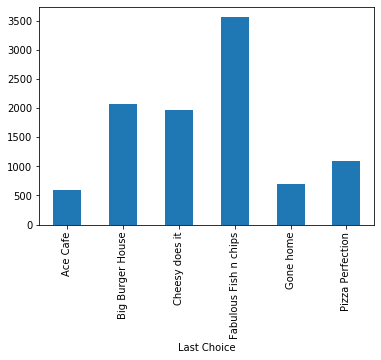

In [7]:
agent_vars.fillna('Gone home').groupby('Last Choice').size().plot.bar()

In [8]:
model_vars = model.datacollector.get_model_vars_dataframe()
model_vars.head()

,Good weather
0,True
1,True
2,True
3,True
4,True


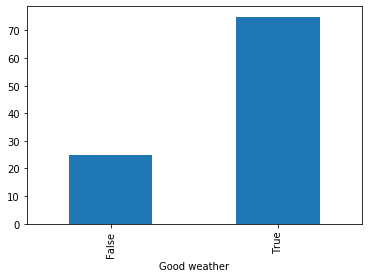

In [9]:
model_vars.groupby('Good weather').size().plot.bar()

In [10]:
agent_vars.to_csv("agent.csv")
model_vars.to_csv("model.csv")